# Необхідно виконати:

In [1]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install requests


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Вивести перші рядки таблиці за допомогою методу head

In [30]:
import pandas as pd
import requests
import numpy as np

url = "https://uk.wikipedia.org/wiki/Населення_України"

response = requests.get(url)
html_content = response.content

tables = pd.read_html(html_content)
data = tables[13]

data.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


## Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [31]:
rows, columns = data.shape
print(f"rows = {rows}\ncolumns = {columns}")

rows = 28
columns = 9


## Замініть у таблиці значення "—" на значення NaN

In [32]:
data.replace("—", np.nan, inplace=True)
print(data)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

## Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [33]:
data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

## Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [35]:
for col in data.columns:
    if col != 'Регіон' and column_types[col] == 'object':
        data[col] = pd.to_numeric(data[col].replace('—', None), errors='coerce')

data.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014      float64
2019      float64
dtype: object

## Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [36]:
data.isna().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

## Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [37]:
data[:-1]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,NaN,NaN
1,Вінницька,224.0,192.0,142.0,124,84,112,109.0,76.0
2,Волинська,247.0,250.0,179.0,153,112,148,141.0,101.0
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111.0,71.0
4,Донецька,271.0,214.0,140.0,109,61,98,82.0,NaN
5,Житомирська,261.0,223.0,159.0,129,89,122,120.0,79.0
6,Закарпатська,314.0,273.0,207.0,168,115,151,146.0,104.0
7,Запорізька,219.0,197.0,150.0,124,71,106,106.0,68.0
8,Івано-Франківська,243.0,248.0,182.0,155,103,124,122.0,88.0
9,Київська,204.0,189.0,156.0,123,73,122,121.0,80.0


## Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [40]:
new_data = data.drop('Регіон', axis=1)
data.fillna(new_data.mean(), inplace=True)
data

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.000000,206.000000,160.000000,130,73,126,111.423077,80.208333
1,Вінницька,224.000000,192.000000,142.000000,124,84,112,109.000000,76.000000
2,Волинська,247.000000,250.000000,179.000000,153,112,148,141.000000,101.000000
3,Дніпропетровська,204.000000,204.000000,151.000000,123,71,112,111.000000,71.000000
4,Донецька,271.000000,214.000000,140.000000,109,61,98,82.000000,80.208333
5,Житомирська,261.000000,223.000000,159.000000,129,89,122,120.000000,79.000000
6,Закарпатська,314.000000,273.000000,207.000000,168,115,151,146.000000,104.000000
7,Запорізька,219.000000,197.000000,150.000000,124,71,106,106.000000,68.000000
8,Івано-Франківська,243.000000,248.000000,182.000000,155,103,124,122.000000,88.000000
9,Київська,204.000000,189.000000,156.000000,123,73,122,121.000000,80.000000


## Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [42]:
mean_2019 = data['2019'].mean()
region_2019 = data[(data["2019"] > mean_2019)]
region_2019['Регіон']

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
27              Україна
Name: Регіон, dtype: object

## У якому регіоні була найвища народжуваність у 2014 році?

In [43]:
max_2014 = data['2014'].max()
region_2014 = data[(data['2014'] == max_2014)]
region_2014['Регіон']

16    Рівненська
Name: Регіон, dtype: object

## Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

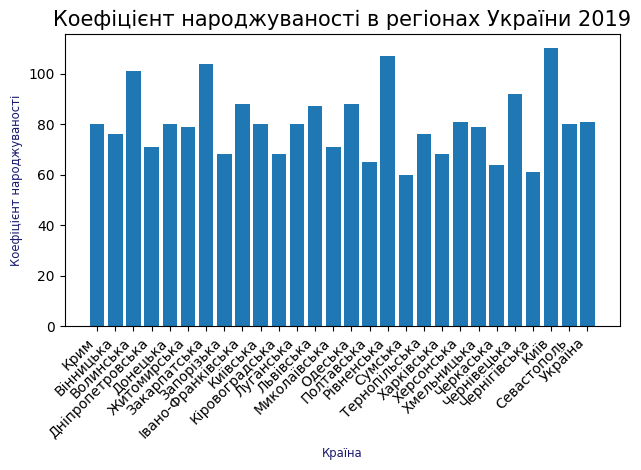

In [50]:
import matplotlib.pyplot as plt

plt.bar(
    data['Регіон'],
    data['2019'], 
)

plt.xlabel("Країна", fontsize="small", color="midnightblue")
plt.ylabel("Коефіцієнт народжуваності", fontsize="small", color="midnightblue")
plt.title("Коефіцієнт народжуваності в регіонах України 2019", fontsize=15)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()